# Neural Networks

Neural Networks for regression and classification

### Configure notebook

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os

from sklearn.model_selection import train_test_split

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# Import code from src
sys.path.insert(0, '../src/')
from project_tools import fig_path

from neuralnetwork import *
from isingmodel import generate_1Ddata

### Regression

Generate data for 1D Ising-model energy:

In [3]:
# generate data
np.random.seed(42)
L = 40     # system size
N = 10000  # number of points
data, target = generate_1Ddata(L, N)

max_val = np.max(target)

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.96, test_size=0.04)

#independent validation set
X_val, y_val = generate_1Ddata(L, 1000)

#normalize target
y_train /= max_val
y_test /= max_val
y_val /= max_val

print(len(y_train))
print(len(y_test))
print(len(y_val))

(10000, 1600)
(1000, 1600)
9600
400
1000


Grid search for neural network:

In [4]:
def R2(y, y_pred):
    y_mean = np.mean(y)
    return 1 - np.sum((y - y_pred)**2) /np.sum((y - y_mean)**2)

def grid_search_nn(learning_rate, penalty, layers, activ_func, cost, batch_size, epochs, X_train, y_train, X_val, y_val):
    count = 0
    tot_steps = len(learning_rate)*len(penalty)

    models = []
    #training models
    for lr in learning_rate:
        for p in penalty:
            count += 1
            
            models.append(NeuralNetwork(layers, activ_func, cost))
            models[-1].train(X_train, y_train, X_val, y_val, lr, p, batch_size, epochs, R2)
            
            if count % (tot_steps / 100) == 0:
                sys.stdout.write("\r" + "%d \%" % (100 * count / tot_steps))
                sys.stdout.flush()
    
    return models

Specify neural network for regression:

In [7]:
tanh = Tanh()
sig = Sigmoid()
relu = Relu()
_pass = Pass()
square_loss = SquareLoss()
np.random.seed(42)

layers = [1600, 400, 1]
activ_func = [tanh, _pass]
cost = square_loss

#learning_rate = [1e-5, 4e-5, 9e-5]
#penalty =       [1e-5, 1e-4, 1e-3]

learning_rate = [7e-5, 9e-5, 1.1e-4]
penalty =       [5e-4, 1e-3, 2e-3]

models = grid_search_nn(learning_rate, penalty, layers, activ_func, cost, 100, 50, X_train, y_train, X_val, y_val)

-40.52406386770437 -43.18444204814948
-16.305731417481326 -17.3788630544577
-7.484222757692946 -7.909195399060943
-3.6003231080091656 -3.866823521531935
-1.7438772334058288 -1.92166995981564
-0.8363949310036849 -0.9472027574825472
-0.32099622910684356 -0.41380524341379465
-0.06020970874522091 -0.14049504367752763
0.08532162088758233 0.023337405893157248
0.16814309690396345 0.11205659168333193
0.20551977091095874 0.14559015752037363
0.2503995408192401 0.2008393190966168
0.27002102407630413 0.22426943188263493
0.2847421742751527 0.2432578325361905
0.2964154335521514 0.2463682484507973
0.2999988867571739 0.2614739302475002
0.31323596533043085 0.2710251676664921
0.3154181590163493 0.28010346722751567
0.3279663287225657 0.2844308917666475
0.3323511468856516 0.28995235392463314
0.3404346327165323 0.29061424316000384
0.3457306369928179 0.29918013368195717
0.35032722076524725 0.30089299569148076
0.3586693335945299 0.3122201071035088
0.3644770752412648 0.32060482295236403
0.3678745627407035 0.3

0.16294213119632373 0.10649251294736184
0.2085910837529743 0.14605640227316818
0.20801320359004793 0.152601068934324
0.2516715806265363 0.19963502435170588
0.2701301993891594 0.2215462423113561
0.28624754408956643 0.23096290771214711
0.3091663095150856 0.2549247306886211
0.3165260172228964 0.26189881253142533
0.3349247923734052 0.2862524646834078
0.36718143981038 0.31350083074577173
0.3885446632257865 0.33457968989670106
0.4092008656938608 0.35152295066899053
0.42983891900891147 0.3834148206196094
0.4479060012741558 0.4025480496453865
0.4781509129786077 0.4332220196253562
0.49684133375159867 0.4519208626006175
0.5288939044268053 0.4854223472232291
0.5552956939406837 0.5135319389511737
0.583258103768195 0.5388060173988115
0.6065131350401812 0.5616510919032829
0.6364560712972873 0.5983197673713163
0.6632669859319291 0.6290866253200822
0.6982636524800112 0.6627975703499995
0.7290843555281474 0.6937103578560374
0.7476736250571864 0.7122138801302316
0.7799784815013252 0.7479319439921495
0.8

0.8021907730754382 0.7807161462882711
0.8056105550782129 0.7860775152517496
0.8086117227693274 0.7896701775007129
0.805557362928385 0.7884446655879913
0.7958488046681406 0.7801514472053633
0.7894074218051882 0.773914857869797
0.7819002401071539 0.7654452914197745
0.7802042087780042 0.7644492035174559
0.7763323488632103 0.7597697850046964
0.771368545170899 0.7542909744866878
0.7708495790979333 0.7528838208240638
0.7643323880664114 0.7469509580369372
0.7643817780445551 0.7481942025319704
0.7623161116943608 0.7460625385030225
0.7565411411342714 0.7410272768091226
0.7579263188190448 0.7410656943411396
0.7612922462086635 0.7439716938897319
0.7615661631115361 0.7435361813275077
0.7616196850302379 0.7438886025674585
0.7551963063367759 0.7366725072790193
0.7578970305388073 0.7403208529018546
0.7569496314686471 0.7393394747821446
0.7601212441088686 0.7411306943127363
0.7612515230076999 0.7445078267775379
0.7583004220652194 0.7405169552740722
0.7582592395712495 0.7398810141474454
0.7590160063477

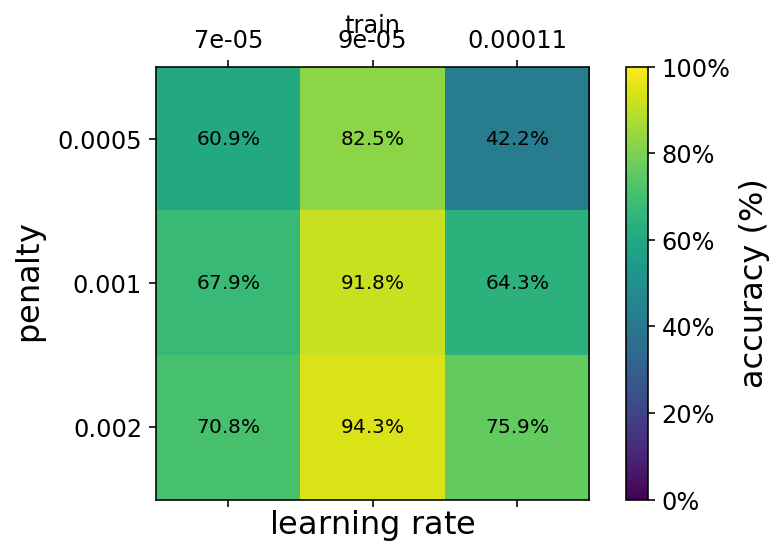

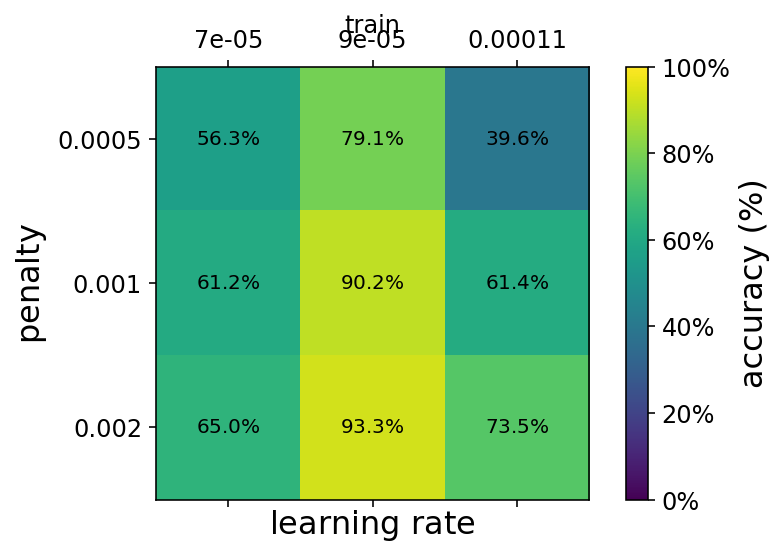

In [102]:
def plot_data(x,y,data,title=None):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{penalty}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()


R2_train = []
R2_test = []
for i in range(len(models)):
    y_pred = models[i].predict(X_train)[:,0]
    R2_train.append(R2(y_train, y_pred)) 
    
    y_pred = models[i].predict(X_test)[:,0]
    R2_test.append(R2(y_test, y_pred))
    
R2_train = np.array(R2_train).reshape((3,3))
R2_test = np.array(R2_test).reshape((3,3))

plot_data(learning_rate, penalty, R2_train, title = "train")
plot_data(learning_rate, penalty, R2_test, title = "train")

7


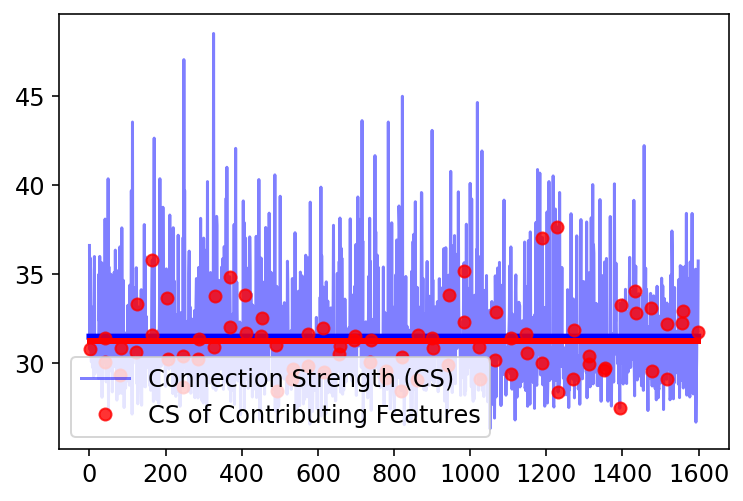

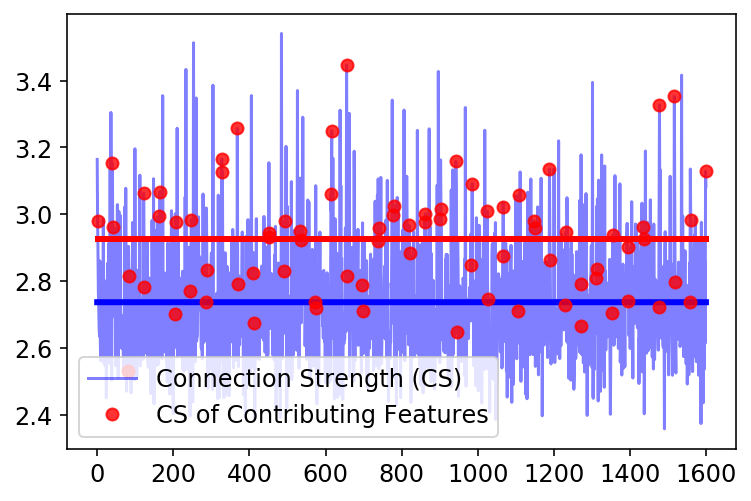

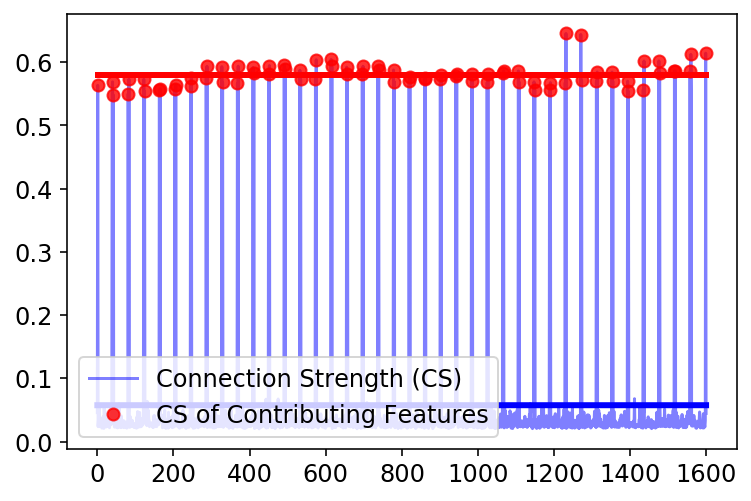

In [119]:
def plot_connection_strength(model):
    connection_strength = np.sum(np.abs(model.W[0]),axis = 0)
    ave_cs = np.mean(connection_strength)*np.ones(len(connection_strength))

    explanatory_weights = np.array(list(range(1, 1600, 41)) + list(range(40, 1600, 41)))
    ave_ew = np.mean(connection_strength[explanatory_weights])*np.ones(len(explanatory_weights))

    plt.plot(connection_strength, "b-", alpha=0.5, label = "Connection Strength (CS)")
    plt.plot(ave_cs,"b-", lw = 3, label = "_no_legend")
    plt.plot(explanatory_weights, connection_strength[explanatory_weights], 
            "ro", label = "CS of Contributing Features", alpha = 0.8)
    plt.plot(explanatory_weights, ave_ew, "r-", lw = 3, label = "_no_legend")
    plt.legend(loc = "lower left")
    plt.show()

print(np.argmax(R2_test))   
best_model = models[np.argmax(R2_test)]
worst_model = models[np.argmin(R2_test)]

plot_connection_strength(models[6])
plot_connection_strength(models[7])
plot_connection_strength(models[8])

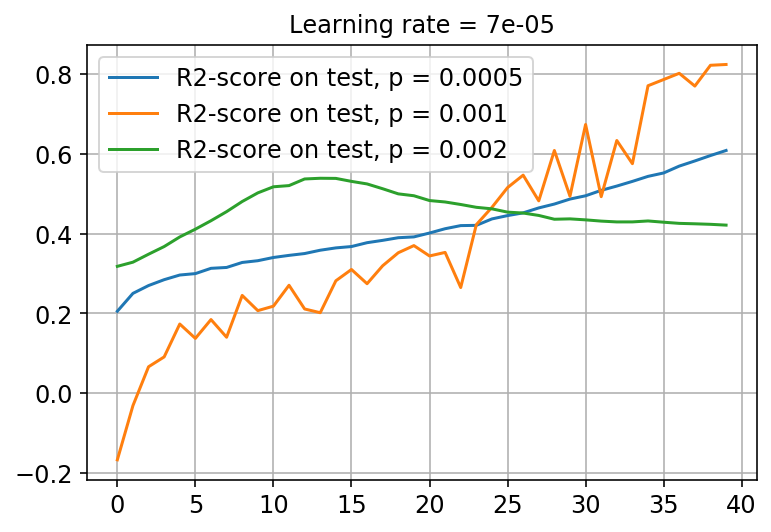

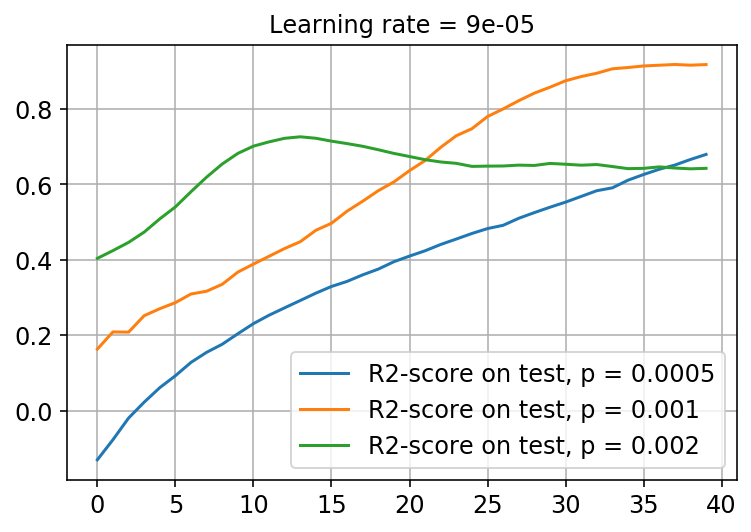

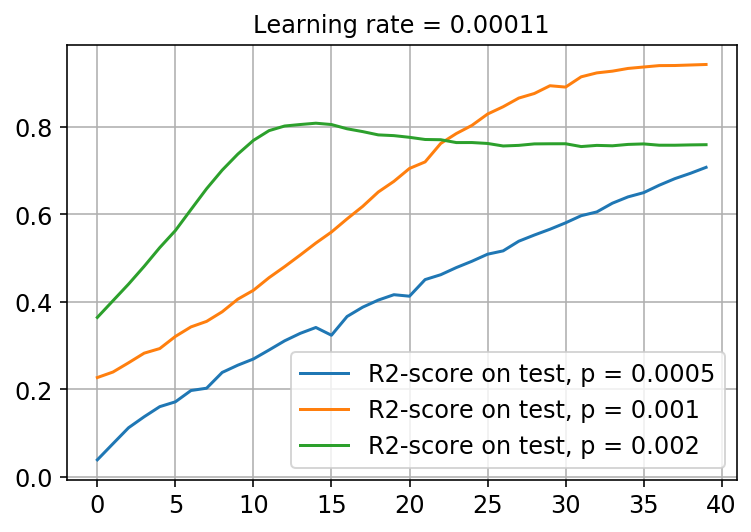

In [128]:
def plot_learning(models, learning_rate, penalty):
    for i in range(len(models)):
        plt.plot(models[i].acc_train[10:])
    
    plt.title("Learning rate = %s"%learning_rate)
    leg = ["R2-score on test, p = %s"%p for p in penalty]
    plt.legend(leg)
    

    plt.grid()
    plt.show()

plot_learning(models[0:3], learning_rate[0], penalty)
plot_learning(models[3:6], learning_rate[1], penalty)
plot_learning(models[6:9], learning_rate[2], penalty)



### Classification

Download data and save locally:

In [130]:
url_main = "https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/"
data_file_name = "Ising2DFM_reSample_L40_T=All.pkl"
label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"

labels = pickle.load(urlopen(url_main + label_file_name))

data = pickle.load(urlopen(url_main + data_file_name))
data = np.unpackbits(data).reshape(-1, 1600)
data = data.astype('int')

np.save("labels", labels)
np.save("spin_data", data)

del data, labels

Load data

In [131]:
X = np.load("spin_data.npy")
y = np.load("labels.npy")

train_to_test_ratio=0.5 # training samples

# divide data into ordered, critical and disordered
X_ordered=X[:70000,:]
y_ordered=y[:70000]

X_critical=X[70000:100000,:]
y_critical=y[70000:100000]

X_disordered=X[100000:,:]
y_disordered=y[100000:]

# Remove critical, since we only want to train on ordered and disorderes
X=np.concatenate((X_ordered,X_disordered))
y=np.concatenate((y_ordered,y_disordered))

# pick random data points from ordered and disordered states 
# to create the training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.1,test_size=0.1)

Specify the neural network classifier

In [132]:
tanh = Tanh()
sig = Sigmoid()
relu = Relu()
cross_entropy = CrossEntropy()

layers = [1600, 400, 1]
activ_func = [sig, sig]
cost = cross_entropy

learning_rate = [0.00003]
penalty =       [0.001]

np.random.seed(42)
models = grid_search_nn(learning_rate, penalty, layers, activ_func, cost, 100, 100, X_train, y_train)

TypeError: grid_search_nn() missing 2 required positional arguments: 'X_val' and 'y_val'

In [ ]:
y_pred = models[-1].predict(X_test)[:,0]
print(y_pred[:10])
print(y_test[:10])
y_pred = np.round(y_pred)

success = np.sum(y_pred == y_test)
print(success/len(y_test))